In [1]:
from matplotlib import pyplot as plt
from openairclim.calc_ch4 import calc_swv_mass_conc
from openairclim.calc_swv import *

delta_mass, delta_conc, swv_distribution= calc_swv_mass_conc([10,20,30,40,50])
delta_mass_a,_, swv_distribution_a= calc_swv_mass_conc([1047,1047,1047,1047,1047])
delta_mass_b,_, swv_distribution_b= calc_swv_mass_conc([614,614,614,614,614])
delta_mass_c,_, swv_distribution_c= calc_swv_mass_conc([212,212,212,212,212])
print(delta_mass_a,delta_mass_b,delta_mass_c)

[  0.          19.03685922  71.13436873 149.73118604 243.89457353] [  0.          11.16392699  41.71585712  87.80797348 143.02890941] [ 0.          3.8546458  14.4035207  30.3180625  49.38457458]


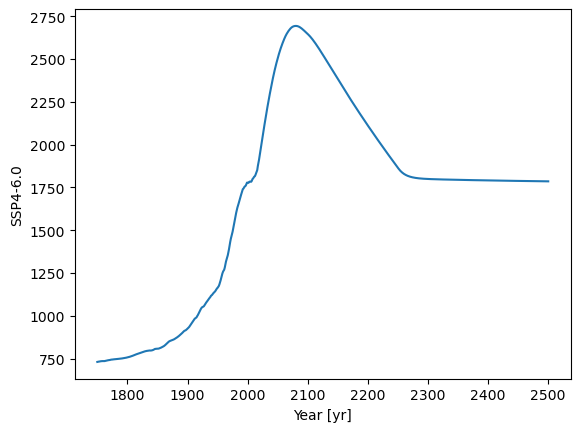

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

ch4_bg = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\repository\ch4_bg.nc"
xrds_ch4_bg = xr.load_dataset(ch4_bg)
xrds_ch4_bg.data_vars['SSP4-6.0'].plot()
plt.show()

ch4_1750 = xrds_ch4_bg.data_vars['SSP5-8.5'][1750-1750].values

ch4_1946 = xrds_ch4_bg.data_vars['SSP5-8.5'][1946-1750].values
ch4_1947 = xrds_ch4_bg.data_vars['SSP5-8.5'][1947-1750].values
ch4_1948 = xrds_ch4_bg.data_vars['SSP5-8.5'][1948-1750].values
ch4_1949 = xrds_ch4_bg.data_vars['SSP5-8.5'][1949-1750].values
ch4_1950 = xrds_ch4_bg.data_vars['SSP5-8.5'][1950-1750].values

ch4_1975 = xrds_ch4_bg.data_vars['SSP5-8.5'][1975-1750].values
ch4_1976 = xrds_ch4_bg.data_vars['SSP5-8.5'][1976-1750].values
ch4_1977 = xrds_ch4_bg.data_vars['SSP5-8.5'][1977-1750].values
ch4_1978 = xrds_ch4_bg.data_vars['SSP5-8.5'][1978-1750].values
ch4_1979 = xrds_ch4_bg.data_vars['SSP5-8.5'][1979-1750].values

# ch4_1995 = xrds_ch4_bg.data_vars['SSP5-8.5'][1995-1750].values
ch4_1996 = xrds_ch4_bg.data_vars['SSP5-8.5'][1996-1750].values
ch4_1997 = xrds_ch4_bg.data_vars['SSP5-8.5'][1997-1750].values
ch4_1998 = xrds_ch4_bg.data_vars['SSP5-8.5'][1998-1750].values
ch4_1999 = xrds_ch4_bg.data_vars['SSP5-8.5'][1999-1750].values
ch4_2000 = xrds_ch4_bg.data_vars['SSP5-8.5'][2000-1750].values

In [3]:
print(ch4_2000-ch4_1750,ch4_2000-ch4_1950,ch4_2000-ch4_1979)
print(ch4_2000,ch4_1950, ch4_1979,ch4_1750)


1046.604125976563 614.189575195313 211.84924316406295
1778.010131835938 1163.820556640625 1566.160888671875 731.406005859375


In [4]:
delta_mass_1750,_, swv_distribution_1750= calc_swv_mass_conc([ch4_1750, ch4_1750, ch4_1750, ch4_1750, ch4_1750])
delta_mass_1950,_, swv_distribution_1950= calc_swv_mass_conc([ch4_1946, ch4_1947, ch4_1948, ch4_1949, ch4_1950])
delta_mass_1979,_, swv_distribution_1979= calc_swv_mass_conc([ch4_1975, ch4_1976, ch4_1977, ch4_1978, ch4_1979])
delta_mass_2000,_, swv_distribution_2000= calc_swv_mass_conc([ch4_1996, ch4_1997, ch4_1998, ch4_1999, ch4_2000])
print(delta_mass_1750)
print(delta_mass_1950)
print(delta_mass_1979)
print(delta_mass_2000)

delta_mass_2000_1750,_, swv_distribution_2000_1750= calc_swv_mass_conc([ch4_1996-ch4_1750, ch4_1997-ch4_1750, ch4_1998-ch4_1750, ch4_1999-ch4_1750, ch4_2000-ch4_1750])


[  0.          13.29863721  49.69255445 104.59817453 170.37818135]
[  0.          20.79436901  77.81031968 164.06976075 267.75920247]
[  0.          27.12326912 101.66640127 214.85125245 351.59027279]
[  0.          31.94975086 119.46389676 251.74802186 410.68812   ]


In [5]:
A = delta_mass_2000[-1] - delta_mass_1750[-1]
B = delta_mass_2000[-1] - delta_mass_1950[-1]
C = delta_mass_2000[-1] - delta_mass_1979[-1]
print(A,B,C)
print(delta_mass_a[-1],delta_mass_b[-1],delta_mass_c[-1])

240.3099386499693 142.92891753295726 59.09784721090915
243.8945735299098 143.02890940531486 49.38457458294258


In [19]:
def pletzer(value):
    a = -0.00088
    b = 0.47373
    c = -0.74676
    
    rf_value = (a * value**2 + b * value + c) / 1000 
    return(rf_value)

def grewe(value):
    return 0.438*value/1000

d = {'SWV': [0, B, C,delta_mass_c[-1]]}

print('transient',pletzer(A),pletzer(B),pletzer(C))
print('oac', calc_swv_rf(d))
print('steady ',pletzer(delta_mass_a[-1]),pletzer(delta_mass_b[-1]),pletzer(delta_mass_c[-1]))

# print('better',grewe(A),grewe(B),grewe(C))
# print('worse ',grewe(delta_mass_a[-1]),grewe(delta_mass_b[-1]),grewe(delta_mass_c[-1]))

transient 0.06227626461637219 0.04898572169180209 0.024176214279655706
oac {'SWV': array([0.        , 0.04898572, 0.02417621, 0.02050202])}
steady  0.06244700088066797 0.049007928597986895 0.020502018655247756


In [7]:
d

{'SWV': [0,
  np.float64(142.92891753295726),
  np.float64(59.09784721090915),
  np.float64(49.38457458294258)]}

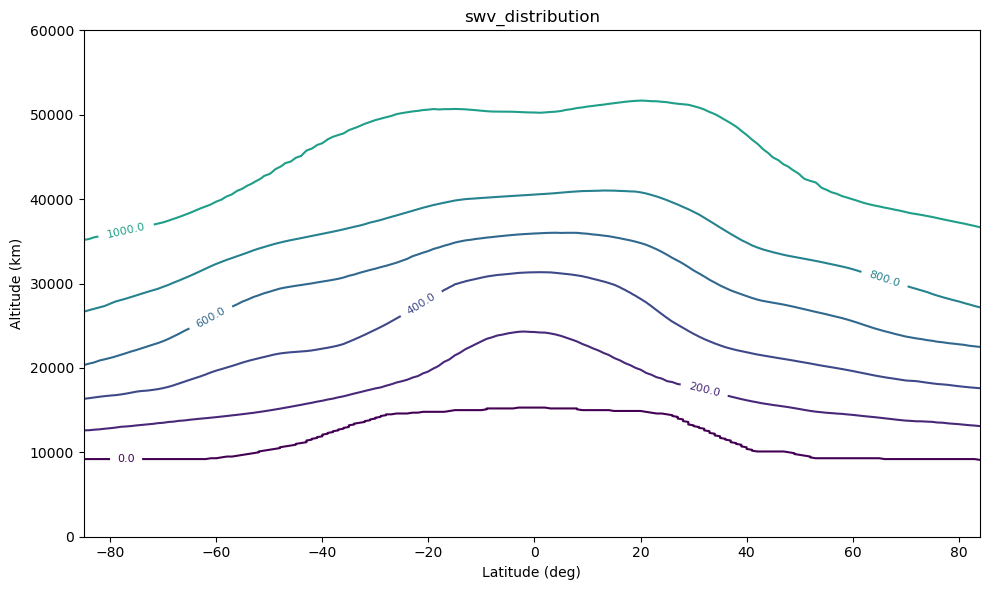

In [8]:

delta_h = 100.0  # height increment in meters
delta_deg = 1.0  # latitude increment
heights = np.arange(0, 60000 + delta_h, delta_h)  # 0 to 60 km
latitudes = np.arange(
    -85, 85, delta_deg
)
plt.figure(figsize=(10, 6))
levels = np.arange(0.0, 2000.0, 200.0)
contours = plt.contour(latitudes, heights,
    swv_distribution_b,
    levels=levels,
    cmap = 'viridis'
)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.1f")
plt.xlabel("Latitude (deg)")
plt.ylabel("Altitude (km)")
plt.title("swv_distribution")
plt.tight_layout()
plt.show()


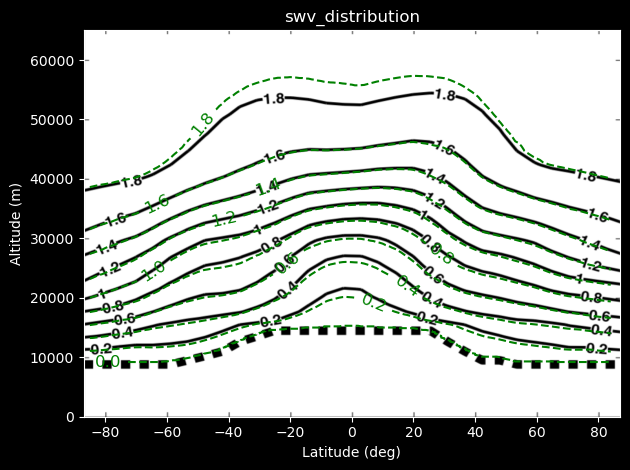

In [20]:
import matplotlib.image as mpimg

# Load your background image
img = mpimg.imread(r"myhre2a.png")  # or .jpg, .tif, etc.

# Create the plot
fig, ax = plt.subplots()

# Show the image as the background
ax.imshow(img, extent=[-87, 87, 0, 65000], aspect='auto')  # adjust extent to match your data coordinates

ax.levels = np.arange(0.0, 2.0, 0.2)
ax.contours = plt.contour(
    latitudes,
    heights,
    (swv_distribution_a)/1000,
    levels=ax.levels,
    colors = 'green',
    linestyles = 'dashed',
    
)
plt.clabel(ax.contours, inline=True, fontsize=12, fmt="%.1f")
plt.xlabel("Latitude (deg)")
plt.ylabel("Altitude (m)")
plt.title("swv_distribution")
plt.tight_layout()
# plt.savefig("swv_distribution_a.png")
plt.show()

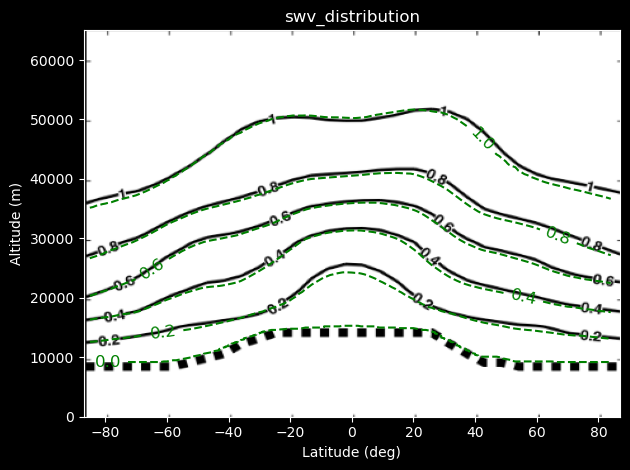

In [21]:
import matplotlib.image as mpimg

# Load your background image
img = mpimg.imread(r"myhre2b.png")  # or .jpg, .tif, etc.

# Create the plot
fig, ax = plt.subplots()

# Show the image as the background
ax.imshow(img, extent=[-87, 87, 0, 65000], aspect='auto')  # adjust extent to match your data coordinates

ax.levels = np.arange(0.0, 2.0, 0.2)
ax.contours = plt.contour(
    latitudes,
    heights,
    (swv_distribution_b)/1000,
    levels=ax.levels,
    colors = 'green',
    linestyles = 'dashed',
)
plt.clabel(ax.contours, inline=True, fontsize=12, fmt="%.1f")
plt.xlabel("Latitude (deg)")
plt.ylabel("Altitude (m)")
plt.title("swv_distribution")
plt.tight_layout()
# plt.savefig("swv_distribution_b.png")
plt.show()

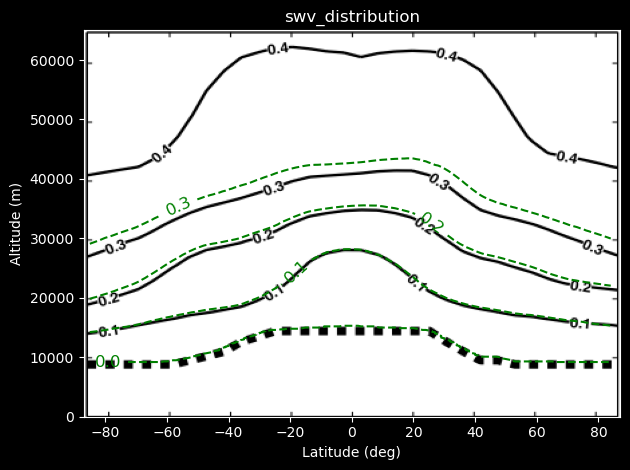

In [22]:
import matplotlib.image as mpimg

# Load your background image
img = mpimg.imread(r"myhre2c.png")  # or .jpg, .tif, etc.

# Create the plot
fig, ax = plt.subplots()

# Show the image as the background
ax.imshow(img, extent=[-87, 87, 0, 65000], aspect='auto')  # adjust extent to match your data coordinates

ax.levels = np.arange(0.0, 1.0, 0.1)
ax.contours = plt.contour(
    latitudes,
    heights,
    (swv_distribution_c)/1000,
    levels=ax.levels,
    colors = 'green',
    linestyles = 'dashed',
)
plt.clabel(ax.contours, inline=True, fontsize=12, fmt="%.1f")
plt.xlabel("Latitude (deg)")
plt.ylabel("Altitude (m)")
plt.title("swv_distribution")
plt.tight_layout()
# plt.savefig("swv_distribution_c.png")
plt.show()

In [12]:
swv_distribution_c

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,387.703075,387.656433,387.613476,387.568135,387.493743,387.441801,387.390060,387.324580,387.224988,387.095760,...,386.567923,386.649908,386.708511,386.770188,386.837966,386.907855,386.977496,387.053851,387.128876,387.199153
597,387.763593,387.717078,387.674060,387.628002,387.553611,387.502361,387.450593,387.384472,387.282859,387.151945,...,386.626573,386.712971,386.771512,386.832811,386.900495,386.970384,387.040034,387.116144,387.191286,387.261661
598,387.824111,387.777723,387.734644,387.687869,387.613478,387.562895,387.511127,387.444364,387.340729,387.208129,...,386.685222,386.776035,386.834512,386.895434,386.963024,387.032913,387.102572,387.178438,387.253695,387.324168
599,387.884629,387.838369,387.795229,387.747736,387.673345,387.623428,387.571660,387.504255,387.398599,387.264314,...,386.743872,386.839098,386.897513,386.958058,387.025574,387.095442,387.165110,387.240731,387.316104,387.386676


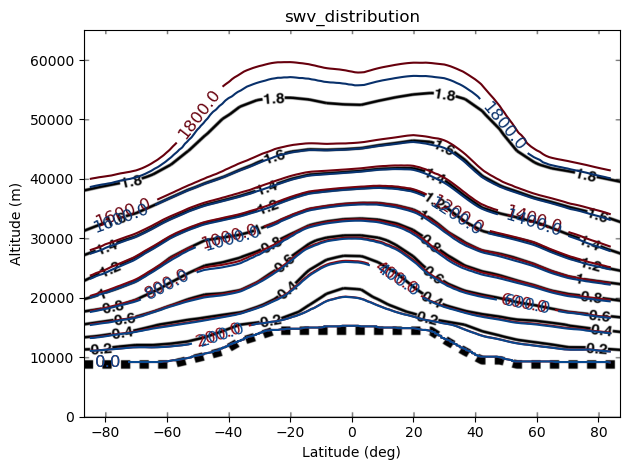

In [13]:
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
def truncate_colormap(cmap_name, minval=0.3, maxval=1.0):
    cmap = plt.get_cmap(cmap_name)
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f"trunc({cmap_name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, 256))
    )
    return new_cmap

# Load your background image
img = mpimg.imread(r"myhre2a.png")  # or .jpg, .tif, etc.

# Create the plot
fig, ax = plt.subplots()

# Show the image as the background
ax.imshow(img, extent=[-87, 87, 0, 65000], aspect='auto')  # adjust extent to match your data coordinates

ax.levels = np.arange(0.0, 2000.0, 200.0)
ax.contours = plt.contour(
    latitudes,
    heights,
    swv_distribution_2000-swv_distribution_1750,
    levels=ax.levels,
    cmap = truncate_colormap('Reds', 0.9, 1.0),
    # alpha = 0.7
)
plt.clabel(ax.contours, inline=True, fontsize=12, fmt="%.1f")

ax.contours1 = plt.contour(
    latitudes,
    heights,
    swv_distribution_a,
    levels=ax.levels,
    cmap = truncate_colormap('Blues', 0.9, 1.0),
    # alpha = 0.7
)
plt.clabel(ax.contours1, inline=True, fontsize=12, fmt="%.1f")
plt.xlabel("Latitude (deg)")
plt.ylabel("Altitude (m)")
plt.title("swv_distribution")
plt.tight_layout()
plt.style.use('dark_background')
# plt.savefig("swv_distribution_aa.png")
plt.show()

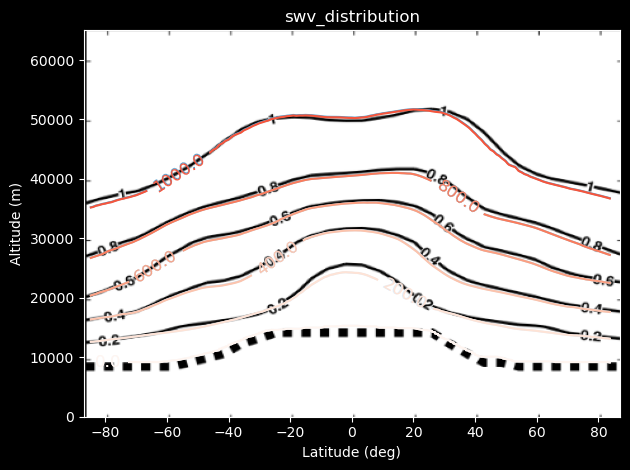

In [14]:
import matplotlib.image as mpimg

# Load your background image
img = mpimg.imread(r"myhre2b.png")  # or .jpg, .tif, etc.

# Create the plot
fig, ax = plt.subplots()

# Show the image as the background
ax.imshow(img, extent=[-87, 87, 0, 65000], aspect='auto')  # adjust extent to match your data coordinates

ax.levels = np.arange(0.0, 2000.0, 200.0)
ax.contours = plt.contour(
    latitudes,
    heights,
    swv_distribution_2000-swv_distribution_1950,
    levels=ax.levels,
    cmap = 'Blues'
)
plt.clabel(ax.contours, inline=True, fontsize=12, fmt="%.1f")

ax.contours1 = plt.contour(
    latitudes,
    heights,
    swv_distribution_b,
    levels=ax.levels,
    cmap = 'Reds'
)
plt.clabel(ax.contours1, inline=True, fontsize=12, fmt="%.1f")
plt.xlabel("Latitude (deg)")
plt.ylabel("Altitude (m)")
plt.title("swv_distribution")
plt.tight_layout()
# plt.savefig("swv_distribution_bb.png")
plt.show()

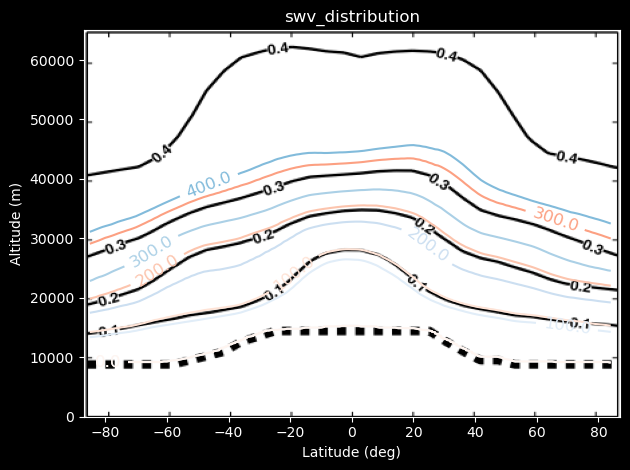

In [15]:
import matplotlib.image as mpimg

# Load your background image
img = mpimg.imread(r"myhre2c.png")  # or .jpg, .tif, etc.

# Create the plot
fig, ax = plt.subplots()

# Show the image as the background
ax.imshow(img, extent=[-87, 87, 0, 65000], aspect='auto')  # adjust extent to match your data coordinates

ax.levels = np.arange(0.0, 1000.0, 100.0)
ax.contours = plt.contour(
    latitudes,
    heights,
    swv_distribution_2000-swv_distribution_1979,
    levels=ax.levels,
    cmap = 'Blues'
)
plt.clabel(ax.contours, inline=True, fontsize=12, fmt="%.1f")

ax.contours1 = plt.contour(
    latitudes,
    heights,
    swv_distribution_c,
    levels=ax.levels,
    cmap = 'Reds'
)
plt.clabel(ax.contours1, inline=True, fontsize=12, fmt="%.1f")
plt.xlabel("Latitude (deg)")
plt.ylabel("Altitude (m)")
plt.title("swv_distribution")
plt.tight_layout()
# plt.savefig("swv_distribution_cc.png")
plt.show()

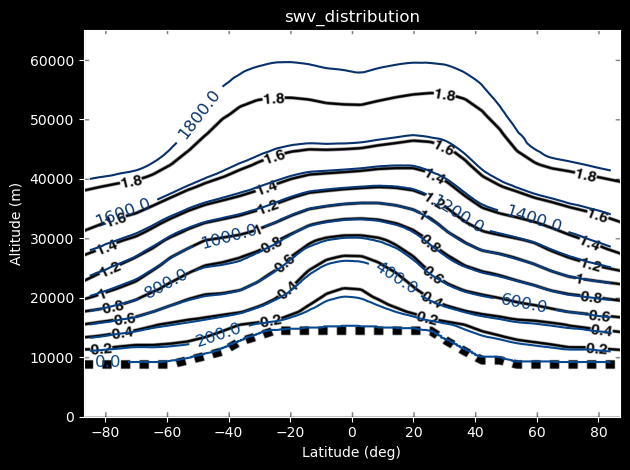

In [16]:
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
def truncate_colormap(cmap_name, minval=0.3, maxval=1.0):
    cmap = plt.get_cmap(cmap_name)
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f"trunc({cmap_name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, 256))
    )
    return new_cmap

# Load your background image
img = mpimg.imread(r"myhre2a.png")  # or .jpg, .tif, etc.

# Create the plot
fig, ax = plt.subplots()

# Show the image as the background
ax.imshow(img, extent=[-87, 87, 0, 65000], aspect='auto')  # adjust extent to match your data coordinates

ax.levels = np.arange(0.0, 2000.0, 200.0)
# ax.contours = plt.contour(
#     latitudes,
#     heights,
#     swv_distribution_2000-swv_distribution_1750,
#     levels=ax.levels,
#     cmap = truncate_colormap('Reds', 0.9, 1.0),
#     # alpha = 0.7
# )
# plt.clabel(ax.contours, inline=True, fontsize=12, fmt="%.1f")

ax.contours1 = plt.contour(
    latitudes,
    heights,
    swv_distribution_2000_1750,
    levels=ax.levels,
    cmap = truncate_colormap('Blues', 0.9, 1.0),
    # alpha = 0.7
)
plt.clabel(ax.contours1, inline=True, fontsize=12, fmt="%.1f")
plt.xlabel("Latitude (deg)")
plt.ylabel("Altitude (m)")
plt.title("swv_distribution")
plt.tight_layout()
plt.style.use('dark_background')
# plt.savefig("swv_distribution_aa.png")
plt.show()

In [17]:
63.8 

63.8